In [34]:
import pandas as pd
import numpy as np

import os

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.cluster import AffinityPropagation
from math import sin, cos, sqrt, atan2, radians
import networkx as nx
from sklearn.metrics import precision_recall_curve

%matplotlib inline

In [15]:
# XGBoost tuning
def score(params):
    seed=int(np.random.rand()*100000)
    cv_res=xgb.cv(params, dtrain, 
              early_stopping_rounds=10, maximize=False, num_boost_round=500, nfold=3, seed=seed, verbose_eval=10)
    score=cv_res['test-logloss-mean'].min()
    best_iter=cv_res[cv_res['test-logloss-mean']==cv_res['test-logloss-mean'].min()].index[0]
    print(score)
    return (score, best_iter, seed) 

best=(1, )
for max_depth in [2,4,6]:
    for eta in [0.1, 0.05, 0.01] :
        params = {
        'eta': eta,
        'max_depth': max_depth,
        'subsample': 0.7,
        #'colsample_bytree': 0.5,
        'objective': 'binary:logistic',
        'booster': 'gbtree',  
        'eval_metric': 'logloss',
        'tree_method': 'approx',
        'silent': 1
        }
        res=score(params)
        if res[0]<best[0]:
            best=res + (params,)

[0]	train-logloss:0.598276+1.75563e-05	test-logloss:0.598283+1.81169e-05
[10]	train-logloss:0.177614+0.00012414	test-logloss:0.177663+0.000140457
[20]	train-logloss:0.0622373+0.000163414	test-logloss:0.0623267+0.00025643
[30]	train-logloss:0.0233213+0.00019067	test-logloss:0.0234593+0.000315661
[40]	train-logloss:0.00944067+0.000205079	test-logloss:0.00964467+0.00036585
[50]	train-logloss:0.00437867+0.000199174	test-logloss:0.00464967+0.00042528
[60]	train-logloss:0.00252067+0.000205941	test-logloss:0.002842+0.000440981
[70]	train-logloss:0.00184267+0.000211629	test-logloss:0.00220833+0.000463995
[80]	train-logloss:0.00158067+0.000218819	test-logloss:0.00200167+0.000491575
[90]	train-logloss:0.00144833+0.000218433	test-logloss:0.001923+0.000508884
[100]	train-logloss:0.00135767+0.000220929	test-logloss:0.001907+0.000520802
[110]	train-logloss:0.00129+0.000222092	test-logloss:0.00189067+0.000528385
[120]	train-logloss:0.00123533+0.000221355	test-logloss:0.001891+0.000536438
0.0018786666

In [16]:
best

(0.0017913333333333334,
 218,
 17686,
 {'booster': 'gbtree',
  'eta': 0.05,
  'eval_metric': 'logloss',
  'max_depth': 2,
  'objective': 'binary:logistic',
  'silent': 1,
  'subsample': 0.7,
  'tree_method': 'approx'})

In [13]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 2,
    'subsample': 0.7,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'tree_method': 'approx',
    #'base_score': y_mean,
    'silent': 1
}
model = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=110) #строим модель

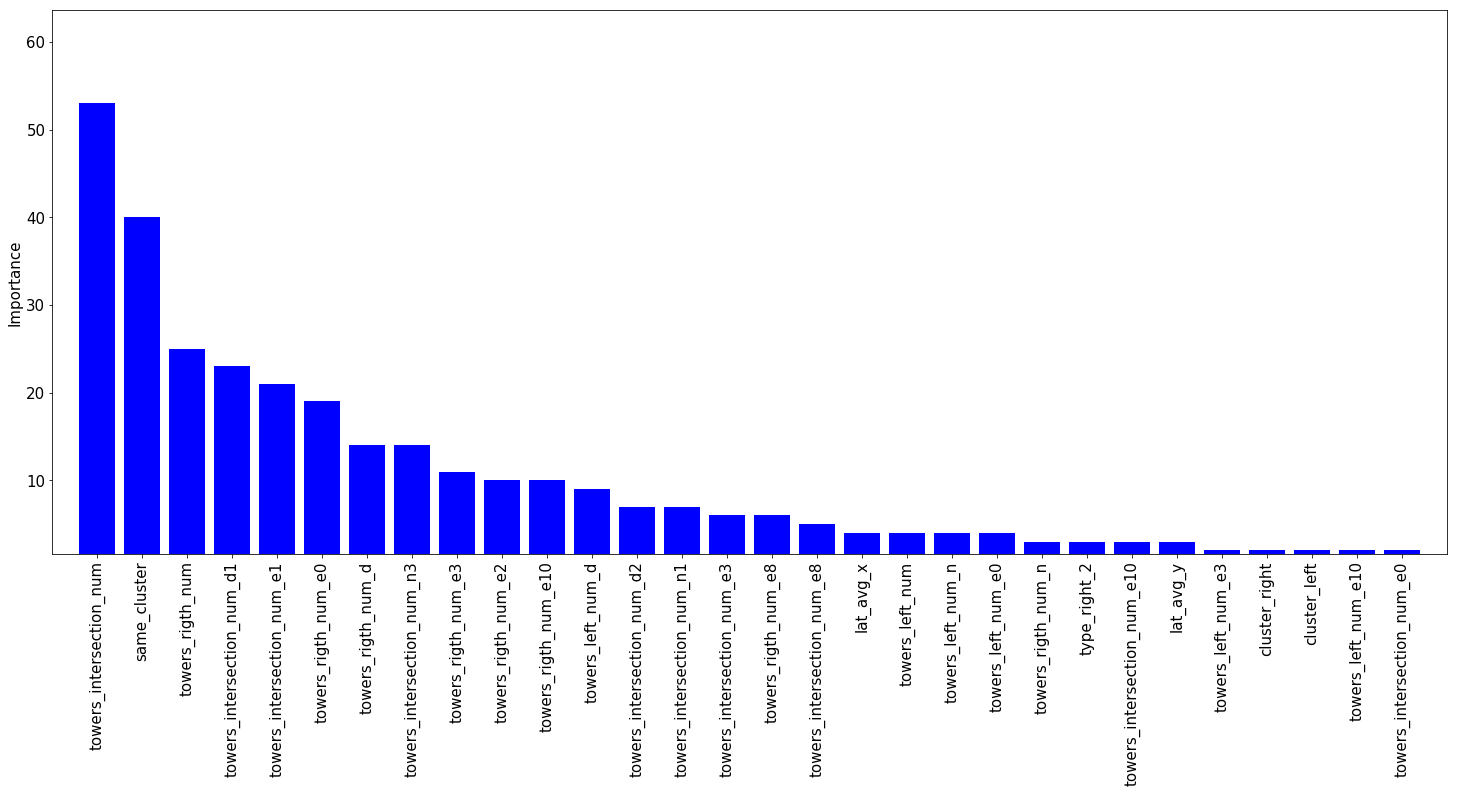

In [14]:
#feature importance
import matplotlib.pyplot as plt
%matplotlib inline
fs = model.get_fscore()
imp=sorted([(k, v) for k, v in fs.items()], key=lambda x:x[1], reverse=True)
imp=imp[:30]
fig=plt.figure(figsize=(25,10))
ax=fig.add_subplot(111)
#ax.set_yscale('log')
ax.bar(range(len(imp)), [v for k, v in imp], color="blue",  align='center')
#plt.xticks(rotation=45)
plt.xticks(range(len(imp)), [k for k, v in imp], fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Importance',fontsize=15)
plt.xlim([-1, len(imp)])
plt.ylim([min([v for k, v in imp])*0.8, max([v for k, v in imp])*1.2])
plt.draw()
plt.savefig('fi')